In [1]:
import numpy as np
!pip install opencv-python
!pip install opencv-python-headless
import cv2

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


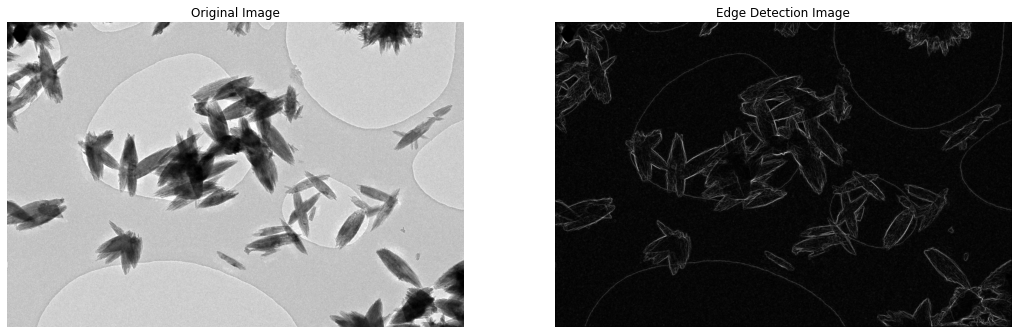

In [8]:
def sobel_edge_detection(image):
   
    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    rows, cols = image.shape
    edge_image = np.zeros_like(image, dtype=np.float64)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            gx = np.sum(np.multiply(Gx, image[i - 1:i + 2, j - 1:j + 2]))
            gy = np.sum(np.multiply(Gy, image[i - 1:i + 2, j - 1:j + 2]))

            edge_image[i, j] = np.sqrt(gx ** 2 + gy ** 2)

    edge_image = (edge_image / edge_image.max()) * 255

    return edge_image.astype(np.uint8)


image_path = 'Sample 22_10k mag_0004.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

edge_image = sobel_edge_detection(image)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Detection Image')
plt.imshow(edge_image, cmap='gray')
plt.axis('off')

plt.show()

In [1]:
def median_filter(image, kernel_size=5):
   
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)

    filtered_image = np.zeros_like(image)
    rows, cols = image.shape

    for i in range(rows):
        for j in range(cols):
            filtered_image[i, j] = np.median(padded_image[i:i + kernel_size, j:j + kernel_size])

    return filtered_image


In [2]:
def sobel_edge_detection(image):
    
    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    rows, cols = image.shape
    edge_image = np.zeros_like(image, dtype=np.float64)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            gx = np.sum(np.multiply(Gx, image[i - 1:i + 2, j - 1:j + 2]))
            gy = np.sum(np.multiply(Gy, image[i - 1:i + 2, j - 1:j + 2]))

            edge_image[i, j] = np.sqrt(gx ** 2 + gy ** 2)

    edge_image = (edge_image / edge_image.max()) * 255

    return edge_image.astype(np.uint8)

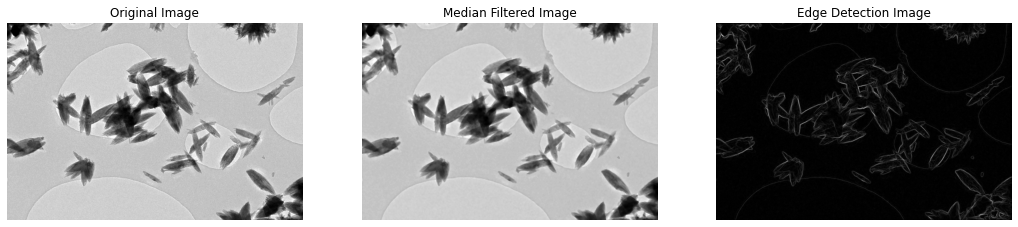

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image_path = 'Sample 22_10k mag_0004.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

filtered_image = median_filter(image, 5)

edge_image = sobel_edge_detection(filtered_image)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Median Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Edge Detection Image')
plt.imshow(edge_image, cmap='gray')
plt.axis('off')

plt.show()

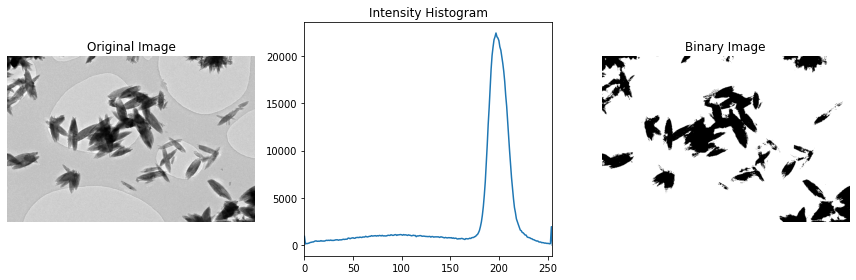

In [9]:
image_path = 'Sample 22_10k mag_0004.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.subplot(1, 3, 2)
plt.plot(histogram)
plt.title('Intensity Histogram')
plt.xlim(0, 255)

# choose a threshold
threshold = 128  
_, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.tight_layout()
plt.show()